In [3]:
#Prob that the given cust is a defaulter
data_dir="E:\Jigsaw\Python"
import os
import pandas as pd

In [4]:
os.chdir(data_dir)
dat=pd.read_csv("credit_history.csv")
dat.isnull().sum()

default        0
amount         0
grade          0
years        279
ownership      0
income         0
age            0
dtype: int64

In [5]:
dat.head()

,default,amount,grade,years,ownership,income,age
0,0,1000,B,2.0,RENT,19200.0,24
1,1,6500,A,2.0,MORTGAGE,66000.0,28
2,0,2400,A,2.0,RENT,60000.0,36
3,0,10000,C,3.0,RENT,62000.0,24
4,1,4000,C,2.0,RENT,20000.0,28


In [6]:
dat['years'].describe()

count    7448.000000
mean        6.086332
std         6.700758
min         0.000000
25%         2.000000
50%         4.000000
75%         8.000000
max        62.000000
Name: years, dtype: float64

In [7]:
dat['years'].fillna(4,inplace=True)
X=dat.drop("default",axis=1) #X has all your independent variables #Y only dependent variable..so we drop default..#axis=1 means columnwise

In [8]:
X['grade'].unique()

array(['B', 'A', 'C', 'D', 'E', 'F', 'G'], dtype=object)

In [9]:
X=pd.get_dummies(X)#in numerical model we usually create dummies
y=dat['default']
#sample() in R does random sampling without replacement beacuse with replacement duplication happens

In [10]:
X.head()

,amount,years,income,age,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,ownership_MORTGAGE,ownership_OTHER,ownership_OWN,ownership_RENT
0,1000,2.0,19200.0,24,0,1,0,0,0,0,0,0,0,0,1
1,6500,2.0,66000.0,28,1,0,0,0,0,0,0,1,0,0,0
2,2400,2.0,60000.0,36,1,0,0,0,0,0,0,0,0,0,1
3,10000,3.0,62000.0,24,0,0,1,0,0,0,0,0,0,0,1
4,4000,2.0,20000.0,28,0,0,1,0,0,0,0,0,0,0,1


In [11]:
import sklearn.model_selection as model_selection #<-you can specify any name on the right
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.2,random_state=200)
#include dependent and independent train and test..for dependent Y we have train and test for independent X we have train and test

In [19]:
X_train.head()
y_train.head()

773     1
5290    0
1692    1
2478    1
3138    0
Name: default, dtype: int64

In [12]:
import sklearn.tree as tree
clf=tree.DecisionTreeClassifier(max_depth=3,random_state=200) #DecisionTreeClassifierMethod used for classification
clf.fit(X_train,y_train) #fit() helps pass the definition of thismodel andbuild the model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=200,
            splitter='best')

In [13]:
cls=clf.predict(X_train) #X_test can also be used
pred=pd.DataFrame({'y_train':y_train,'cls':cls}) #DF has original y data and predicted ---#leave...thesegive the internal func of score

In [15]:
pred.query("y_train==1 & cls==1").shape[0] #-->leave

2136

In [ ]:
pred.query("y_train==0 & cls==0").shape[0]  #-->leave

In [ ]:
(2136+1773)/pred.shape[0] #-->leave

In [14]:
clf.score(X_test,y_test) #Average number of correct predictions on test set given by score

0.6274256144890039

In [16]:
clf.predict_proba(X_test) #Gives probalities 
#1st col predictsp for 0 ..index0 for this
#2nd col  predicts for1..index 1 for this

array([[0.7838765 , 0.2161235 ],
       [0.7838765 , 0.2161235 ],
       [0.866171  , 0.133829  ],
       ...,
       [0.33271144, 0.66728856],
       [0.62803532, 0.37196468],
       [0.49720149, 0.50279851]])

In [20]:
import sklearn.metrics as metrics
metrics.roc_auc_score(y_test,clf.predict_proba(X_test)[:,1])#pass only 1st col because we want only prob for 1
#this helps find area under curve weget 0.67 so pred from this model is 67% accurate

0.6721250820352787

In [21]:

import pydotplus
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
os.chdir(data_dir)
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=X.columns,  
                         class_names=["0","1"],  
                         filled=True, rounded=True,  
                       proportion=True)
#to visualize tree we use tree module andexport_graphviz...clf is DT model name,out_file means do we want to take file outside
#feature_names refers to col names of indp vars...#class_names specify unque value of target var..proportion of 0's and 1's
#filled-filling nodes with color rounded-rounds the values of proportion
graph = pydotplus.graph_from_dot_data(dot_data)   

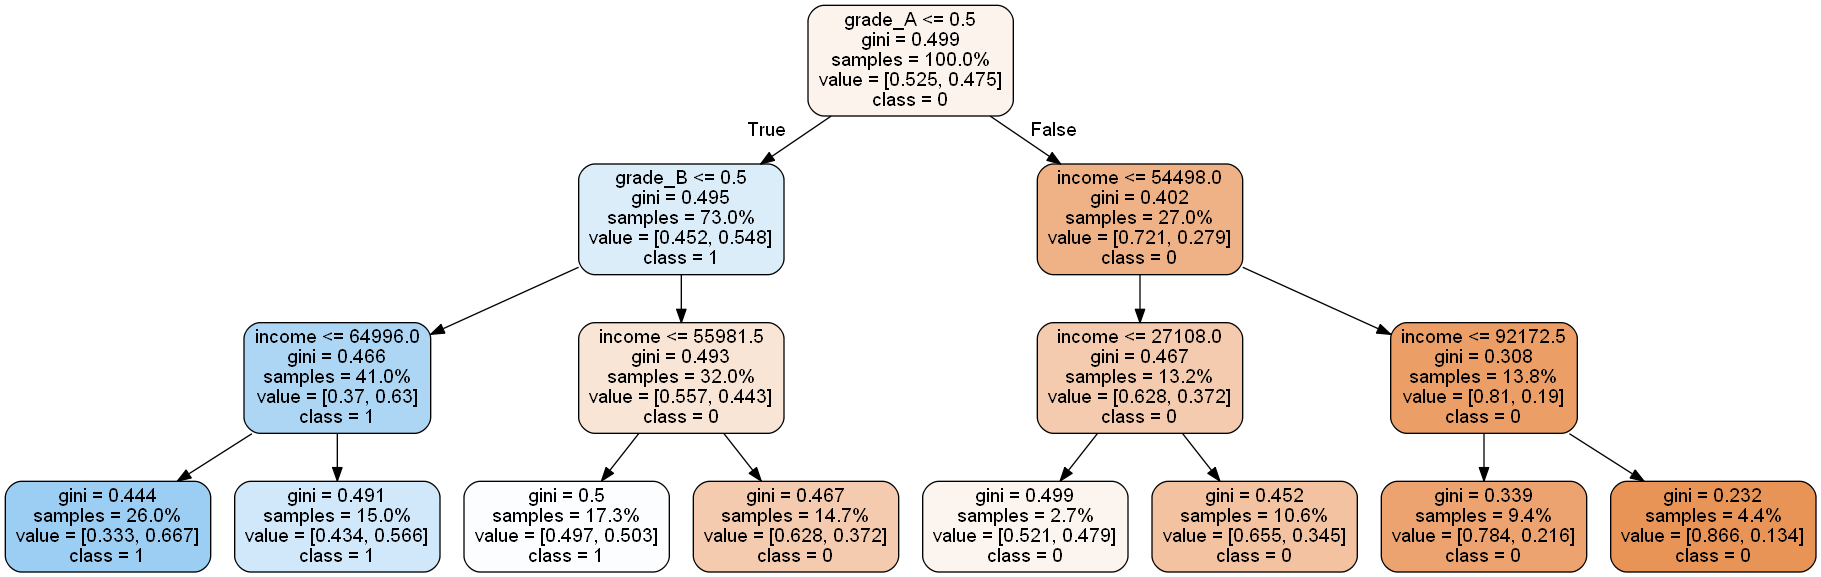

In [23]:
from IPython.display import Image
Image(graph.create_png())
#plotting in png format...we are plotting graphusing create_png()

In [ ]:
#First split on grade A..52% of time 0s 42 % ot time 1s ..majority is shown by class i.e 0 or 1
#then splits into less tha 0.5i.e grade B which has 73% of sample  and more than 0.5 on right
#see last node value col..here66% chance of default for one set of conditions
#All leaf nodes gives the whole data...here data divided into 8 groups
#it tries with all cols...the best result is shown
#by default proportion rounded to 3

In [25]:
graph.write_jpeg("tree.jpeg")

True

In [ ]:
###Grid Search Cross validation

In [26]:
model=model_selection.GridSearchCV(clf, param_grid={'max_depth':[3,4,5]}) #to do cross validation
#trying to find wich depth is correct..i.e tune max_depth ith 3values and select the one that gives a better rsult..you can give more values also but here we select 3
#...for more than 1 parameter after ]give , and pass it
model.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=200,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 4, 5]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [27]:
model.best_estimator_  #We extract the best estimator...her max_depth=5 is selected

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=200,
            splitter='best')

In [28]:
model.best_score_ #we check best aacuracy score..before 0.627 now 0.629..so accuracy slightly increased

0.6298333602976864

In [29]:
import sklearn.metrics as metrics
metrics.roc_auc_score(y_test,model.predict_proba(X_test)[:,1]) #we are getting area under curve

0.6760493818892891

In [30]:
#Feature importance
pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False).head(5)
#converting to panda series and sorting to see importance

#Feature importance assigned based on reduction of gini..if gini reducesby large extent that has more impact
#diff in gini*proportion becomes feature imp
#proportion is (the records in current sample/Total no of records)..seenotes

grade_A           0.554912
grade_B           0.245647
income            0.199442
ownership_RENT    0.000000
ownership_OWN     0.000000
dtype: float64

In [ ]:
###Regression Tree

In [ ]:
#Preding amt spent using diff marketing values

In [31]:
import os
import pandas as pd

dat=pd.read_csv("dm.csv")
dat.columns

X=dat.drop(['Cust_Id','AmountSpent'],axis=1)
X=pd.get_dummies(X)
y=dat['AmountSpent']

In [32]:
X.head()

,Salary,Children,Catalogs,Age_Middle,Age_Old,Age_Young,Gender_Female,Gender_Male,OwnHome_Own,OwnHome_Rent,Married_Married,Married_Single,Location_Close,Location_Far,History_High,History_Low,History_Medium
0,47500,0,6,0,1,0,1,0,1,0,0,1,0,1,1,0,0
1,63600,0,6,1,0,0,0,1,0,1,0,1,1,0,1,0,0
2,13500,0,18,0,0,1,1,0,0,1,0,1,1,0,0,1,0
3,85600,1,18,1,0,0,0,1,1,0,1,0,1,0,1,0,0
4,68400,0,12,1,0,0,1,0,1,0,0,1,1,0,1,0,0


In [33]:
import sklearn.model_selection as model_selection

X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.2,random_state=200)
#random_state is enough no need of 200....test will be 20% of entire data set 

In [34]:
import sklearn.tree as tree 
reg=tree.DecisionTreeRegressor(max_depth=3) #because here target variable amt is a continuous variable so DecisionRegression used
reg.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [35]:
reg.score(X_test,y_test) #For Regression this is R Square value

0.5915701153457273

In [36]:
import pydotplus
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
os.chdir(data_dir)
dot_data = tree.export_graphviz(reg, out_file=None, 
                         feature_names=X.columns,  
                         filled=True, rounded=True,  
                         special_characters=True) #Specialcharacters--

In [37]:
graph = pydotplus.graph_from_dot_data(dot_data) 
#in graph where amount is high dark colornode

graph.write_jpeg("tree_reg.jpeg")

True

In [38]:
import sklearn.metrics

In [39]:
sklearn.metrics.mean_squared_error(y_test,reg.predict(X_test)) #reg.predict is usedon test data set

421270.24467456294

In [40]:
#Feature Importance: Total reduction of purity measure brought out by a feature
pd.Series(reg.feature_importances_,index=X.columns).sort_values(ascending=False)
#Salary mosyt imp feature..followed by catalog ...others are very less so not imp

Salary             0.680609
Catalogs           0.177714
History_Medium     0.059444
History_Low        0.045373
History_High       0.036859
Location_Far       0.000000
Location_Close     0.000000
Married_Single     0.000000
Married_Married    0.000000
OwnHome_Rent       0.000000
Gender_Male        0.000000
Gender_Female      0.000000
Age_Young          0.000000
Age_Old            0.000000
Age_Middle         0.000000
Children           0.000000
OwnHome_Own        0.000000
dtype: float64

In [ ]:
#Interpret the tree

In [41]:
X_test.shape

(200, 17)

In [42]:
sklearn.metrics.mean_squared_error(y_train,reg.predict(X_train)) #not very necessaryon train but imp on testz
#This is on train...this value on test does not have to be equal

334416.1033783246

In [ ]:
#ytrainand ytest should be similar <--we only check for this finally